Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



image 1/1 c:\Users\ManhNgyn\Documents\Workspace\Python_Workspace\Nhan_dien_bien_so_xe\nhieubien.jpg: 416x640 4 Plakas, 50.4ms
Speed: 3.2ms preprocess, 50.4ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)


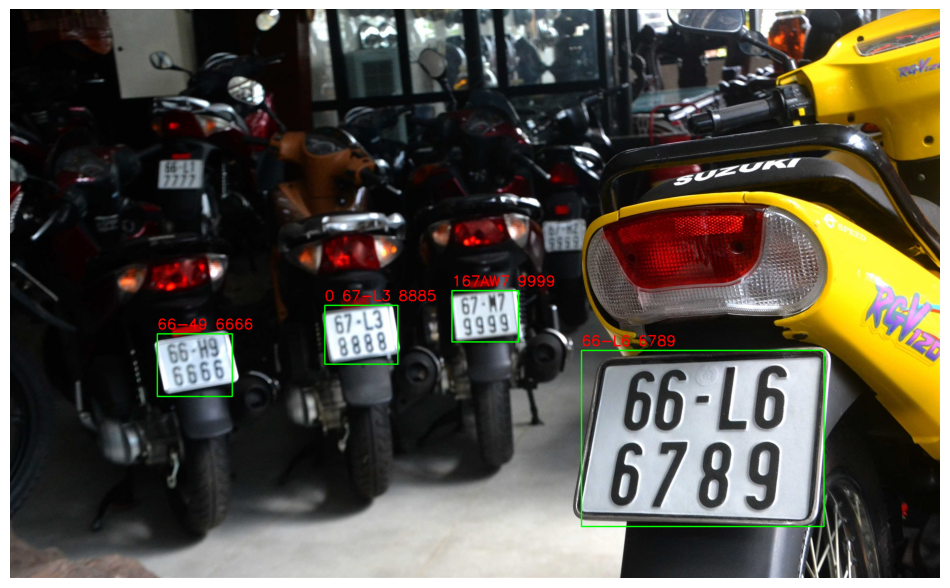

In [64]:
from ultralytics import YOLO
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt

# Tải mô hình và khởi tạo EasyOCR
model_path = "runs/weights/best.pt"
model = YOLO(model_path)
reader = easyocr.Reader(['en'], gpu=True)

# Load ảnh gốc
image_path = "nhieubien.jpg"
image = cv2.imread(image_path)
assert image is not None, "Không đọc được ảnh gốc!"

# Detect biển số
results = model(image_path)
boxes = results[0].boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]

# Duyệt qua từng bounding box
for box in boxes:
    x1, y1, x2, y2 = map(int, box)
    
    # Crop biển số từ ảnh gốc
    cropped_plate = image[y1:y2, x1:x2]

    # Dùng EasyOCR đọc chữ từ vùng crop
    ocr_results = reader.readtext(cropped_plate, allowlist='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ-')

    # Ghép các dòng OCR thành một dòng
    plate_text = " ".join([text for (_, text, _) in ocr_results])

    # Vẽ bounding box lên ảnh gốc
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Ghi text lên ảnh gốc, phía trên box
    cv2.putText(image, plate_text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Hiển thị ảnh kết quả
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
